In [228]:
#Machine Learning Major Project -SENTIMENT ANALYSIS

In [229]:
import pandas as pd
import numpy as np

In [230]:
df=pd.read_table('/content/Restaurant_Reviews.tsv',sep='\t')
df

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [232]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [233]:
df.shape

(1000, 2)

In [234]:
df.size

2000

In [235]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [236]:
df.describe()

Liked
count  1000.00000
mean      0.50000
std       0.50025
min       0.00000
25%       0.00000
50%       0.50000
75%       1.00000
max       1.00000

In [237]:
df.head()

Review  Liked
0                           Wow... Loved this place.      1
1                                 Crust is not good.      0
2          Not tasty and the texture was just nasty.      0
3  Stopped by during the late May bank holiday of...      1
4  The selection on the menu was great and so wer...      1

In [238]:
df.tail()

Review  Liked
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1    500
0    500
Name: Liked, dtype: int64

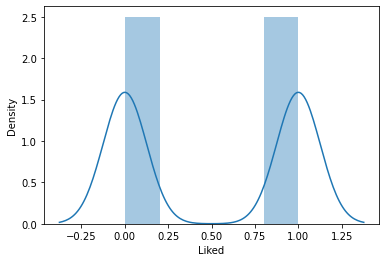

In [239]:
import seaborn as sns      #Data Analysis:- The number of positive and negative reviews are equal with 500 each and average at 1.5
sns.distplot(df['Liked'])                  # (Considering that positive reviews are numbered as "1"s and negative reviews are "0"s)
df['Liked'].value_counts()

In [240]:
import matplotlib.pyplot as plt
import numpy as np

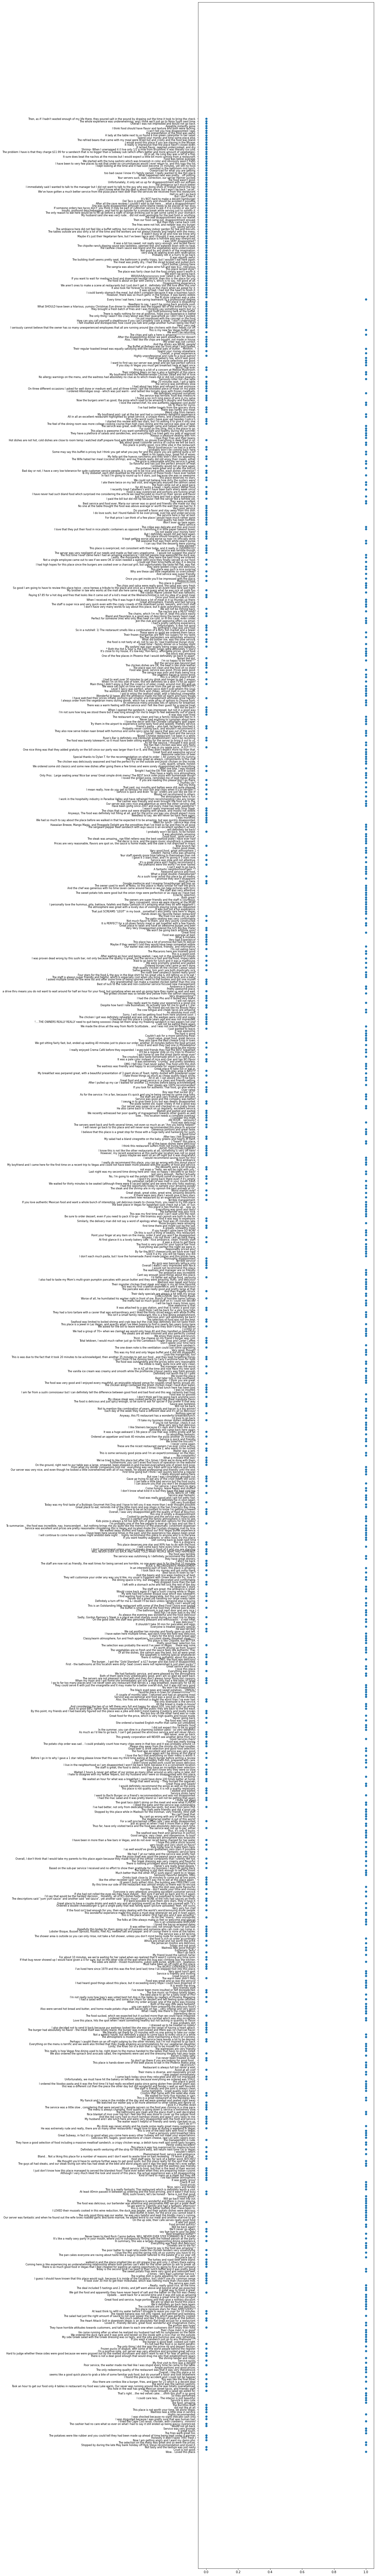

In [241]:
plt.figure(figsize=(10,150))
plt.yticks(fontsize=8)
plt.scatter(df['Liked'],df['Review'])
plt.show()

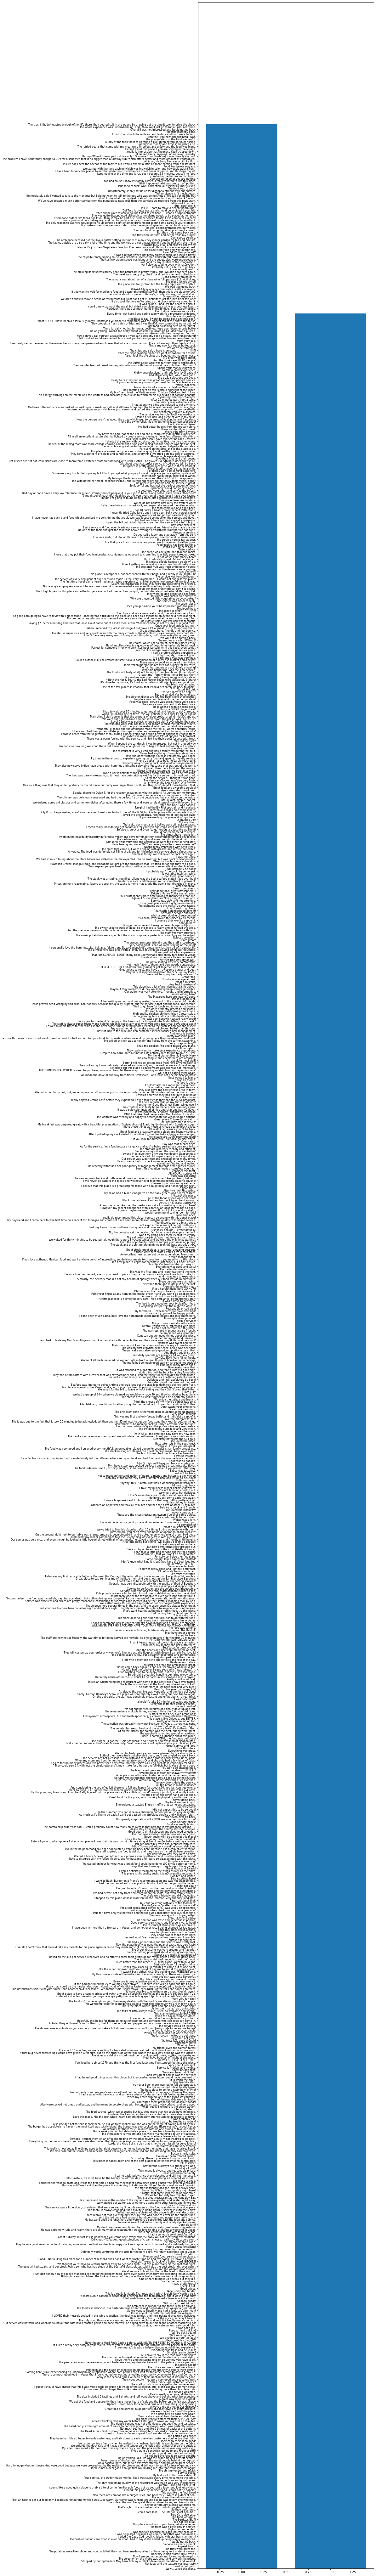

In [242]:
plt.figure(figsize=(10,150))
plt.yticks(fontsize=8)
plt.bar(df['Liked'],df['Review'])
plt.show()

In [243]:
import pandas as pd

In [244]:
#Given data set:- https://www.kaggle.com/datasets/d4rklucif3r/restaurant-reviews

In [245]:
df=pd.read_table('/content/Restaurant_Reviews.tsv',sep='\t')
df

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[1000 rows x 2 columns]

In [246]:
df = df.drop_duplicates(keep = 'last') 
df

Review  Liked
0                             Wow... Loved this place.      1
1                                   Crust is not good.      0
2            Not tasty and the texture was just nasty.      0
3    Stopped by during the late May bank holiday of...      1
4    The selection on the menu was great and so wer...      1
..                                                 ...    ...
995  I think food should have flavor and texture an...      0
996                           Appetite instantly gone.      0
997  Overall I was not impressed and would not go b...      0
998  The whole experience was underwhelming, and I ...      0
999  Then, as if I hadn't wasted enough of my life ...      0

[996 rows x 2 columns]

In [247]:
df['Review'][900]

'Spend your money elsewhere.'

In [248]:
df['Liked'][900]

0

In [249]:
df['Review'][0]

'Wow... Loved this place.'

In [250]:
df['Liked'][0]

1

In [251]:
df['Liked'].value_counts()

1    499
0    497
Name: Liked, dtype: int64

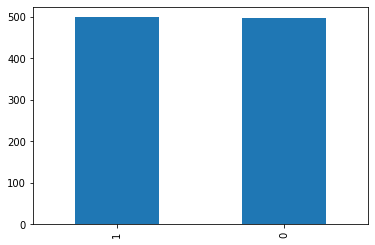

In [252]:
df['Liked'].value_counts().plot(kind='bar')

In [253]:
x = df['Review'].values
y = df['Liked'].values

In [254]:
df.shape

(996, 2)

In [255]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [256]:
x_train.shape

(747,)

In [257]:
x_test.shape

(249,)

In [258]:
#Applying Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer 
vect = CountVectorizer(stop_words = 'english')

In [259]:
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [260]:
x_train_vect.toarray() #To convert text into numerical values,so that applying Machine Learning will be simple

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [261]:
#METHOD 1 - Using Support Vector Classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [262]:
y_pred = model.predict(x_test_vect)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1])

In [263]:
from sklearn.metrics import accuracy_score #Accuracy obtained from SVM is 0.7269076305220884
accuracy_score(y_pred,y_test)

0.7269076305220884

In [264]:
# METHOD 2 - Using Pipelines [# SVC + countvectorizer]
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [265]:
accuracy_score(y_pred2,y_test) #Accuracy obtained from SVC Pipeline model is 0.8152610441767069

0.8152610441767069

In [266]:
# METHOD 3 - USING NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()  

In [267]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [268]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [269]:
accuracy_score(y_pred3,y_test) # Accuracy obtained from NB method is 0.7469879518072289

0.7469879518072289

In [270]:
# METHOD 4 - Naive Bayes + Countvectorizer pipeline
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [271]:
accuracy_score(y_pred4,y_test) #Accuracy obtained from NB+CountVectorizer pipeline is 0.7791164658634538

0.7791164658634538

In [272]:
# ACCURACY SCORES USING COUNT VECTORIZER
# accuracy score - 0.7269076305220884  (SVC)
# accuracy score - 0.8152610441767069  (SVC pipeline)
# accuracy score - 0.7469879518072289 (MultinomialNB)
# accuracy score - 0.7791164658634538  (MultinomialNB pipeline) 

In [273]:
# ***APPLYING TFIDF VECTORIZER***
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = 'english')

In [274]:
vect = TfidfVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test) 

In [275]:
x_train_vect.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [276]:
#METHOD 1 - Using Support Vector Classifier
from sklearn.svm import SVC 
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [277]:
y_pred = model.predict(x_test_vect)
y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1])

In [278]:
from sklearn.metrics import accuracy_score #Accuracy obtained from SVM is 0.7309236947791165
accuracy_score(y_pred,y_test)

0.7309236947791165

In [279]:
# METHOD 2 - Using Pipelines [# SVC + Tfidf Vectorizer]
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(TfidfVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [280]:
accuracy_score(y_pred2,y_test) #Accuracy obtained from SVC Pipeline model is 0.8192771084337349

0.8192771084337349

In [281]:
# METHOD 3 - USING NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [282]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [283]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [284]:
accuracy_score(y_pred3,y_test) # Accuracy obtained from NB method is 0.7389558232931727

0.7389558232931727

In [285]:
# METHOD 4 - Naive Bayes + TfidfVectorizer pipeline
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(TfidfVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1])

In [286]:
accuracy_score(y_pred4,y_test) #Accuracy obtained from NB+TfidfVectorizer pipeline is 0.7831325301204819

0.7831325301204819

In [287]:
# ACCURACY SCORES USING TFIDF VECTORIZER
# accuracy score - 0.7309236947791165  (SVC)
# accuracy score - 0.8192771084337349  (SVC pipeline)
# accuracy score - 0.7389558232931727 (MultinomialNB)
# accuracy score - 0.7831325301204819  (MultinomialNB pipeline)

In [288]:
 # Entered REVIEW is Positive or Negative

In [289]:
import joblib # Using Model 2(Pipeline method) which gave the highest accuracy
joblib.dump(model2,'review-nature') #Either positive or Negative

['review-nature']

In [290]:
import joblib
reload_model = joblib.load('review-nature')

In [291]:
reload_model.predict(['Wow'])

array([1])

In [292]:
reload_model.predict(['Waste of Time'])

array([0])

In [293]:
reload_model.predict(['Nice'])

array([1])

In [294]:
reload_model.predict(['The Hell'])

array([0])

In [295]:
reload_model.predict(['Average'])

array([0])

In [296]:
reload_model.predict(['Fine I guess'])

array([0])

In [297]:
reload_model.predict(['Its good!'])

array([1])

In [298]:
# WEBAPP using this model
# Streamlit

In [299]:
!pip install streamlit --quiet

In [300]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("SENTIMENT ANALYSIS")
reload_model = joblib.load('review-nature')
ip = st.text_input("Enter the review :")
op = reload_model.predict([ip])
if st.button('PREDICT'):
  st.title(op[0])

Overwriting app.py


In [301]:
!streamlit run app.py & npx localtunnel --port 8501

2022-04-10 10:06:12.265 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.236.197.167:8501

npx: installed 22 in 3.069s
your url is: https://fast-fireant-23.loca.lt
  Stopping...
^C
